# Short introduction to Linear Algebra using Sympy

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Online-Sympy-server" data-toc-modified-id="Online-Sympy-server-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Online Sympy server</a></span></li><li><span><a href="#Import" data-toc-modified-id="Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Entering-a-matrix" data-toc-modified-id="Entering-a-matrix-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Entering a matrix</a></span></li><li><span><a href="#Finding-Reduced-Row-Echelon-Form" data-toc-modified-id="Finding-Reduced-Row-Echelon-Form-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Finding Reduced Row Echelon Form</a></span></li><li><span><a href="#Finding-Inverses" data-toc-modified-id="Finding-Inverses-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finding Inverses</a></span></li><li><span><a href="#Least-Squares-and-Normal-Equation" data-toc-modified-id="Least-Squares-and-Normal-Equation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Least Squares and Normal Equation</a></span><ul class="toc-item"><li><span><a href="#We-may-solve-the-normal-equation." data-toc-modified-id="We-may-solve-the-normal-equation.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>We may solve the normal equation.</a></span></li><li><span><a href="#We-may-use-the-solve_least_squares-function-of-sympy" data-toc-modified-id="We-may-use-the-solve_least_squares-function-of-sympy-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>We may use the solve_least_squares function of sympy</a></span></li></ul></li><li><span><a href="#Orthogonal-projection-into-$Im(A)$" data-toc-modified-id="Orthogonal-projection-into-$Im(A)$-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Orthogonal projection into $Im(A)$</a></span><ul class="toc-item"><li><span><a href="#Case-$A$-orthonormal" data-toc-modified-id="Case-$A$-orthonormal-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Case $A$ orthonormal</a></span></li><li><span><a href="#General-Case" data-toc-modified-id="General-Case-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>General Case</a></span></li></ul></li><li><span><a href="#Gram-Schmidt-and-QR-Factorization" data-toc-modified-id="Gram-Schmidt-and-QR-Factorization-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Gram-Schmidt and QR Factorization</a></span><ul class="toc-item"><li><span><a href="#The-process" data-toc-modified-id="The-process-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>The process</a></span></li><li><span><a href="#Using-Sympy-routines" data-toc-modified-id="Using-Sympy-routines-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Using Sympy routines</a></span></li><li><span><a href="#Gram-Schmidt-Example-generator" data-toc-modified-id="Gram-Schmidt-Example-generator-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Gram Schmidt Example generator</a></span></li></ul></li></ul></div>

## Online Sympy server

https://live.sympy.org/

## Import

Import Sympy and assure pretty printing

In [2]:
from sympy import init_session
init_session()

IPython console for SymPy 1.6.2 (Python 3.8.6-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.2/



## Entering a matrix

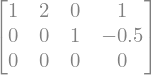

In [3]:
a=Matrix([[1,2,0,1],[0,0,1,-1/2],[0,0,0,0]])
a

## Finding Reduced Row Echelon Form

The matrix:

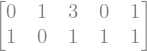

In [4]:
A=Matrix([[0,1,3,0,1],[1,0,1,1,1]]);
A

The RREF:

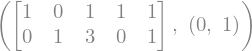

In [5]:
A.rref()

## Finding Inverses

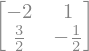

In [6]:
A=Matrix([[1,2],[3,4]]);
B=A.inv()
B

We may also use the RREF

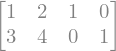

In [7]:
A=Matrix([[1,2,1,0],[3,4,0,1]]);
A

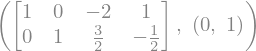

In [7]:
A.rref()

## Least Squares and Normal Equation

Least square solutions of $Ax=b$ are solutions of the normal equation:
$$ A^TAx=A^Tb.$$
Example:

We set the $A$ and $b$.

In [8]:
A=Matrix([[1,2],[3,4],[0,0]])
b=Matrix([0,0,1])

### We may solve the normal equation.

In [9]:
(A.transpose()*A).solve(A.transpose()*b)

### We may use the solve_least_squares function of sympy

In [10]:
A.solve_least_squares(b)

## Orthogonal projection into $Im(A)$

### Case $A$ orthonormal
When A is orthonormal (its column vectors are orthonormal) then the orthogonal projection into $Im(A)$ has standard matrix $$AA^T.$$
Example:

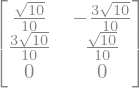

In [8]:
A=Matrix([[1,-3],[3,1],[0,0]])/sqrt(10)
A

The orthogonal projection into $Im(A)$ should just keep the first two components and output $0$ for the third.
That is 
\begin{align}
A=\begin{bmatrix}1&0&0\\0&1&0\\0&0&0\end{bmatrix}.
\end{align}
Let us confirm.

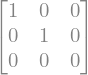

In [9]:
A*A.transpose()

### General Case 
When $\ker(A)=\{0\}$, the standard matrix of the orthogonal projection into $Im(A)$ is
$$
A(A^TA)^{-1}A^T.
$$
Example:

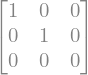

In [13]:
A=Matrix([[1,2],[3,4],[0,0]])
A*(A.transpose()*A).inv()*A.transpose()

## Gram-Schmidt and QR Factorization

### The process
The goal is to construct an orthonormal basis out of a set of vectors.

Let us start with this matrix:

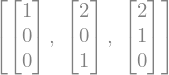

In [11]:
M=[Matrix([1,0,0]),Matrix([2,0,1]),Matrix([2,1,0])]
M

In [12]:
print('First vector is normalized. Q =')
u=M[0]/M[0].norm()
display(u)

First vector is normalized. Q =


Second vector is projected and we normalize its orthogonal component. Q = 


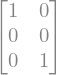

In [13]:
print('Second vector is projected and we normalize its orthogonal component. Q = ')
v_new=M[1]
# orthogonal component
u_new=v_new-u*u.transpose()*v_new
# normalized
u_new=u_new/u_new.norm()
# Expend the subspace
u=Matrix.row_join(u,u_new)
display(u)

Third vector is projected and we normalize its orthogonal component. Q = 


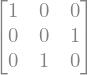

In [14]:
print('Third vector is projected and we normalize its orthogonal component. Q = ')
v_new=M[2]
# Project
u_new=v_new-u*u.transpose()*v_new
# Take the norm
u_new=u_new/u_new.norm()
# Expand
u=Matrix.row_join(u,u_new)
display(u)

Making it as a routine:

In [15]:
def myGrSc(listOfVectors):
    M=listOfVectors
    i=-len(M)
    u=M[i]/M[i].norm()
    while i<-1:
        i=i+1
        # new vector
        v_new=M[i]
        # project vector
        u_new=v_new-u*u.transpose()*v_new
        # normalize
        u_new=u_new/u_new.norm()
        # add
        u=Matrix.row_join(u,u_new)
        
    return u
       

We apply it to $M$

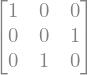

In [16]:
myGrSc(M)

### Using Sympy routines

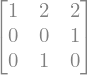

In [17]:
M=Matrix(3,3,[1,2,2,0,0,1,0,1,0])
M

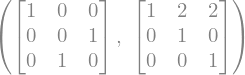

In [18]:
M.QRdecomposition()

### Gram Schmidt Example generator

In [86]:
import random
from IPython.display import display, Math

n=random.choice(range(2,4))
m=random.choice(range(2,4))
pool=range(-5,5)
mat=Matrix(n,m,[random.choice(pool) for _ in range(n*m)])
# displays the v
temp=[]
for i in range(m): 
    temp.append(fr"v_{i+1} =")
    temp.append(latex(mat[:,i]))
    temp.append("; ")
display(Math(" ".join(temp)))
    
if len(mat.rref()[1])!=m:
    display(mat)
    print("Matrix has dependent columns")
else:    
    w1=mat[:,0]
    u1=w1/w1.norm()
    u=[u1]
    temp=[fr"w_1=",latex(w1),";\ \|w_1\| = ",latex(w1.norm()),fr"; \ u_1=",latex(u1)]
    display(Math(" ".join(temp)))

    for i in range(1,m):
        temp=[]
        temp2=[]
        v_i=mat[:,i]
        temp.append(fr"w_{i+1}=v_{i+1}")
        temp2.extend([fr"w_{i+1}= ",latex(v_i)])
        w_i=v_i
        for k,vec in enumerate(u):
            coef=v_i.dot(vec)
            temp.append("-")
            temp2.append("-")
            temp.append(fr"\langle v_{i+1},u_{k+1}\rangle u_{k+1}")
            temp2.extend([r"\left(",latex(coef),r"\right)"])
            temp2.append(latex(vec))
            w_i-=coef*vec
        #temp2.extend([" = ",latex(w_i)])
        display(Math(" ".join(temp)))
        display(Math(" ".join(temp2)))
        u_i=w_i/w_i.norm()
        temp=[fr"w_{i+1}=",latex(w_i),fr";\ \|w_{i+1}\| = ",latex(w_i.norm()),
              fr";\ u_{i+1}=",latex(u_i)]
        display(Math(" ".join(temp)))

        u.append(u_i)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>